In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%cd ~/Desktop/notebook_data/nyc_taxi

data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

data = pd.read_csv(data_filename, parse_dates=['pickup_datetime', 'dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])



C:\Users\Doyeon\Desktop\notebook_data\nyc_taxi


Index(['rate_code', 'store_and_fwd_flag', 'pickup_datetime',
       'dropoff_datetime', 'passenger_count', 'trip_time_in_secs',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

Text(0, 0.5, 'Taxi rides')

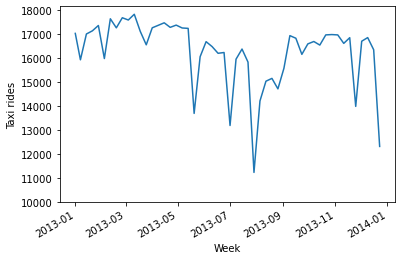

In [21]:
weekly = data.groupby(data.pickup_datetime.dt.weekofyear)
x = weekly.pickup_datetime.first()
y = weekly.size()
pd.Series(y.values, index=x).plot()
plt.ylim(10000)
plt.xlabel('Week') 
plt.ylabel('Taxi rides')

In [24]:
tip = fare[['medallion', 'tip_amount']].loc[fare.tip_amount>0].groupby('medallion').mean()
print(len(tip))
tip.head(3)

13407


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,1.815854
000318C2E3E6381580E5C99910A60668,2.857222
000351EDC735C079246435340A54C7C1,2.099111


Text(0, 0.5, '# of taxis')

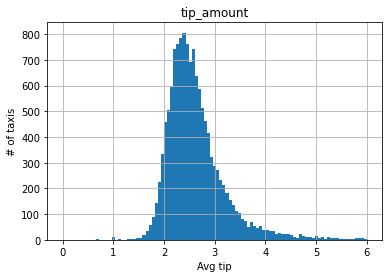

In [25]:
tip.hist(bins=np.linspace(0, 6, 100))
plt.xlabel('Avg tip')
plt.ylabel('# of taxis')

In [27]:
data_merged = pd.merge(data, tip, how='left', left_on='medallion', right_index=True)
data_merged.head(10)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_time_in_mins,tip_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,5.000000,3.180417
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,16.000000,2.863235
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,6.433333,2.147143
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085,0.000000,2.498750
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597,6.000000,2.604571
5,61E558C4FCB0BCB8562FC37B06B97FFE,76DC5E351A0E646679BCA84B18B37B9A,VTS,1,NaN,2013-01-01 00:07:00,2013-01-01 00:34:00,1,1620,5.81,-73.955238,40.768978,-73.994064,40.720299,27.000000,2.447000
6,36EDC01D57A6489E2DEE50734ECB327D,35E93075DA51FFDEFA6B3FA0C49A0C70,VTS,1,NaN,2013-01-01 00:08:00,2013-01-01 00:15:00,5,420,1.25,-73.985580,40.752197,-73.988777,40.737244,7.000000,2.790909
7,131162C7685521FA81608D3C42E4EF29,A1C3B89CD387ABD20F337A2DA15F88D7,CMT,1,N,2013-01-01 00:08:38,2013-01-01 00:18:20,2,581,1.80,-73.999413,40.730137,-73.983047,40.741844,9.683333,2.830882
8,22467390B5CCC51FD1B12659F6084B2F,12EED5AC20F50C538A3C9F3270A63EFA,VTS,1,NaN,2013-01-01 00:09:00,2013-01-01 00:20:00,1,660,1.79,-73.992180,40.738644,-73.973099,40.749355,11.000000,1.906129
9,939D5E5E9555C02F0DB5B4B4F2D6BCBC,0413E28D43093EFA4044A8D30B84DAF6,CMT,1,N,2013-01-01 00:09:32,2013-01-01 00:19:58,1,625,1.70,-74.006554,40.740540,-73.980469,40.730408,10.416667,3.433478
